In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/areum/Documents/ISLR/Auto.csv', index_col=0, usecols=range(0,10))

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
medi = df.mpg.median()

In [5]:
df['mpg01'] = [1 if mpg > medi else 0 for mpg in df['mpg']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
mpg01           392 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 33.7+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


## Investigate the association between mpg01 and the other features

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

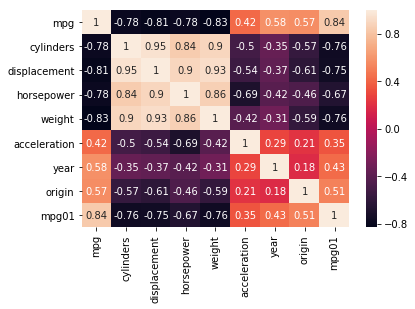

In [9]:
sns.heatmap(df.corr(), annot=True)

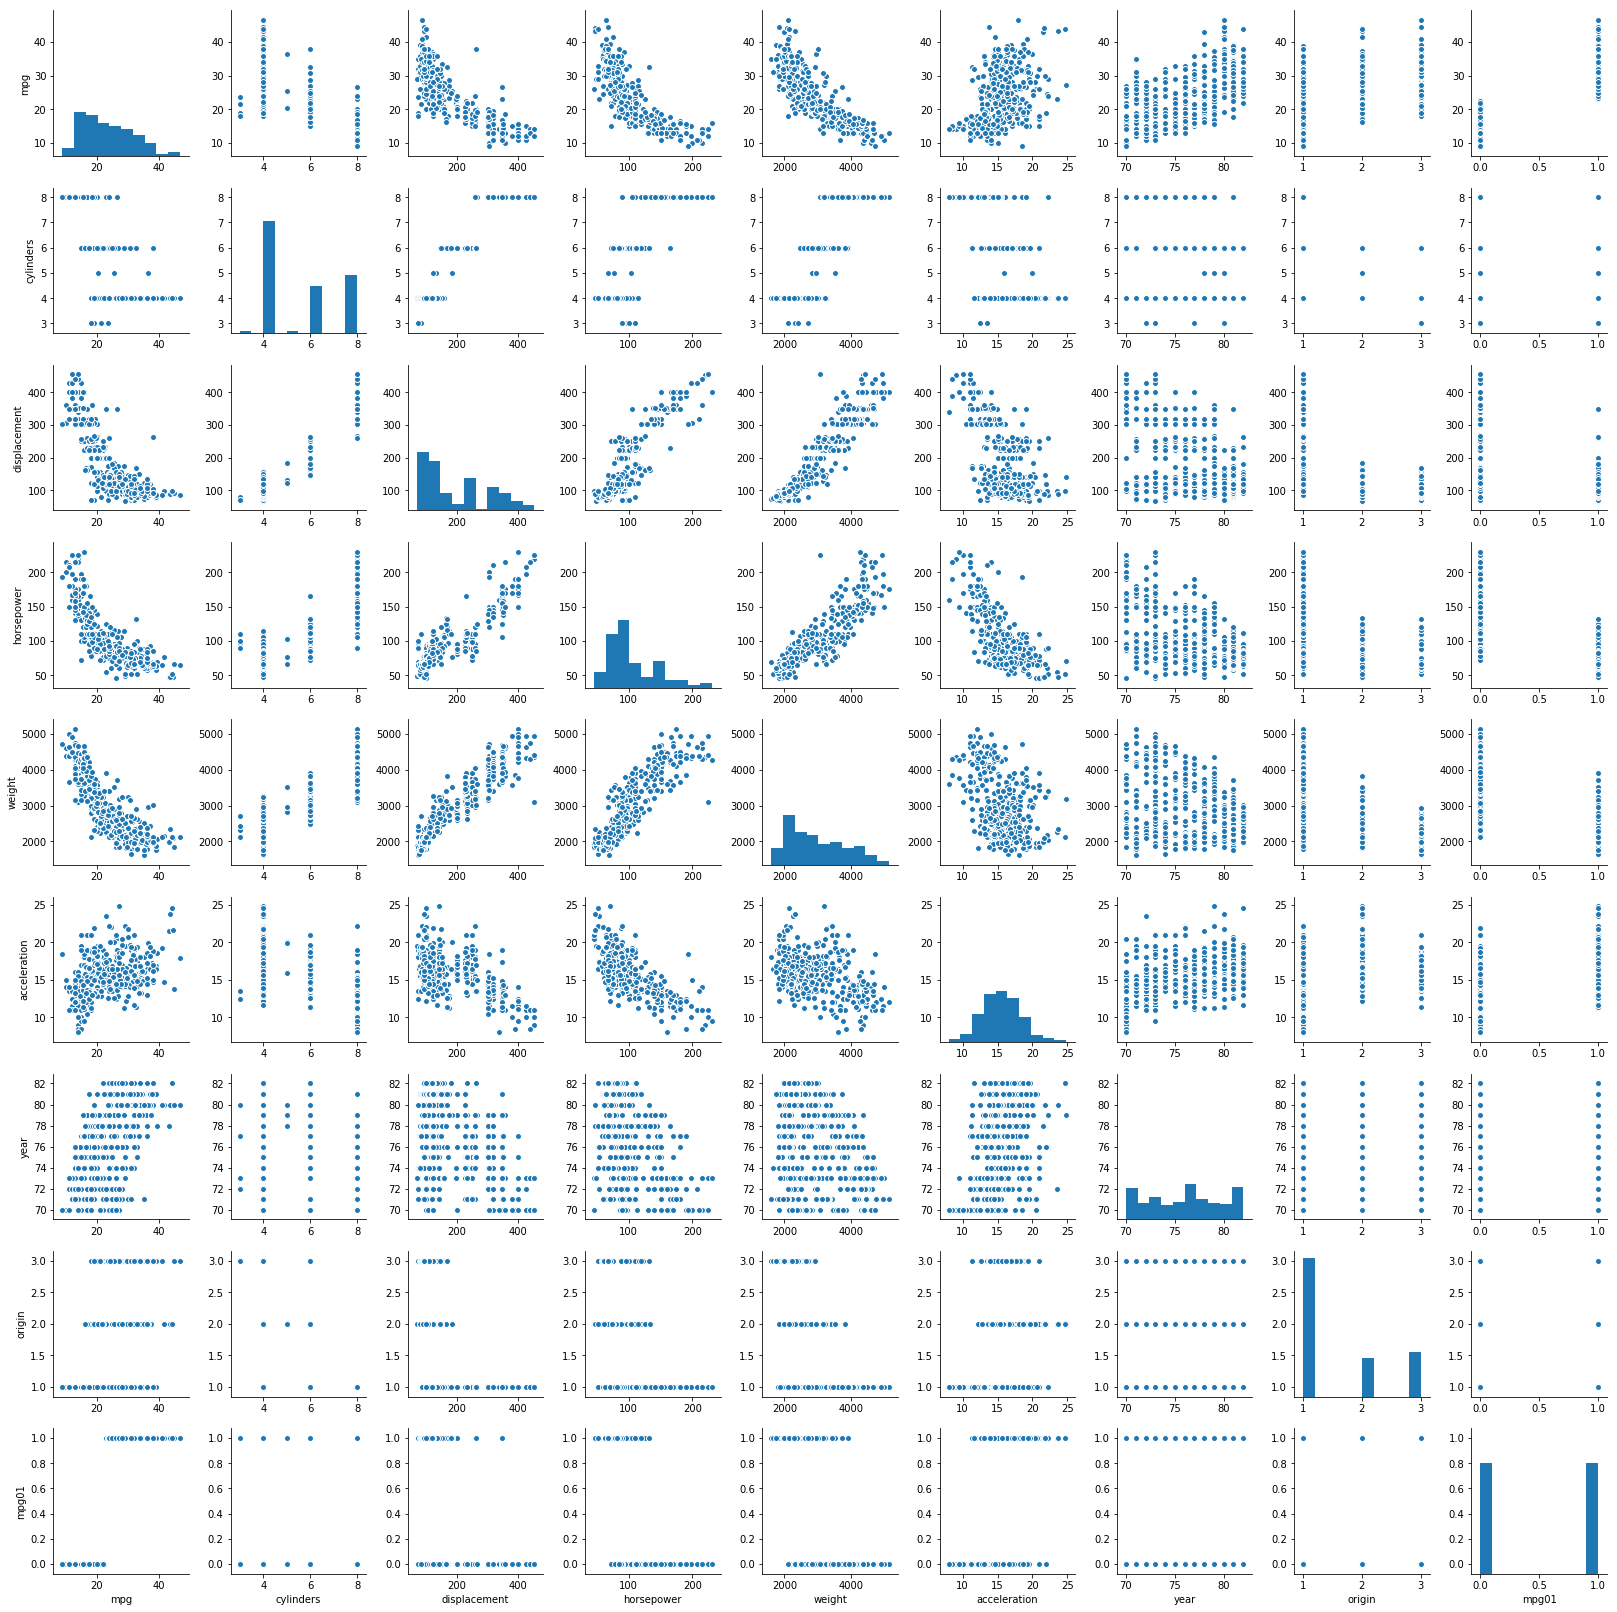

In [10]:
sns.pairplot (df)

## Split the data into a training set and a test set

In [11]:
df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

In [13]:
y = df['mpg01'].values
X = df[['displacement', 'horsepower', 'weight','acceleration']].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Linear Discriminant Analysis

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [17]:
lda = LinearDiscriminantAnalysis()

In [18]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [19]:
lda_pred = lda.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, lda_pred, digits=3))

             precision    recall  f1-score   support

          0      0.966     0.877     0.919        65
          1      0.864     0.962     0.911        53

avg / total      0.920     0.915     0.915       118



In [22]:
print(confusion_matrix(y_test, lda_pred))

[[57  8]
 [ 2 51]]


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, lda_pred)

0.9152542372881356

In [25]:
np.mean(y_test != lda_pred)

0.084745762711864403

## Quadratic Discriminant Analysis

In [26]:
qda = QuadraticDiscriminantAnalysis()

In [27]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [28]:
qda_pred = qda.predict(X_test)

In [29]:
print(classification_report(y_test, qda_pred, digits=3))

             precision    recall  f1-score   support

          0      0.952     0.923     0.938        65
          1      0.909     0.943     0.926        53

avg / total      0.933     0.932     0.932       118



In [30]:
print(confusion_matrix(y_test, qda_pred))

[[60  5]
 [ 3 50]]


In [32]:
accuracy_score(y_test, qda_pred)

0.93220338983050843

In [33]:
np.mean(y_test != qda_pred)

0.067796610169491525

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()

In [36]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
log_pred = log.predict(X_test)

In [38]:
print(classification_report(y_test, log_pred, digits=3))

             precision    recall  f1-score   support

          0      0.894     0.908     0.901        65
          1      0.885     0.868     0.876        53

avg / total      0.890     0.890     0.890       118



In [39]:
print(confusion_matrix(y_test, log_pred))

[[59  6]
 [ 7 46]]


In [40]:
np.mean(y_test != log_pred)

0.11016949152542373

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    print('n_neighbors: ', i)
    print(classification_report(y_test, knn_pred, digits=3))
    print(confusion_matrix(y_test, knn_pred))
    print('\n')
    print('R Squared: ', accuracy_score(y_test, knn_pred))
    print('Error Rate: ', np.mean(y_test != knn_pred))
    print('\n'*2)

n_neighbors:  1
             precision    recall  f1-score   support

          0      0.932     0.846     0.887        65
          1      0.831     0.925     0.875        53

avg / total      0.887     0.881     0.882       118

[[55 10]
 [ 4 49]]


R Squared:  0.881355932203
Error Rate:  0.118644067797



n_neighbors:  2
             precision    recall  f1-score   support

          0      0.870     0.923     0.896        65
          1      0.898     0.830     0.863        53

avg / total      0.882     0.881     0.881       118

[[60  5]
 [ 9 44]]


R Squared:  0.881355932203
Error Rate:  0.118644067797



n_neighbors:  3
             precision    recall  f1-score   support

          0      0.906     0.892     0.899        65
          1      0.870     0.887     0.879        53

avg / total      0.890     0.890     0.890       118

[[58  7]
 [ 6 47]]


R Squared:  0.889830508475
Error Rate:  0.110169491525



n_neighbors:  4
             precision    recall  f1-score   support



R Squared:  0.889830508475
Error Rate:  0.110169491525



n_neighbors:  29
             precision    recall  f1-score   support

          0      0.948     0.846     0.894        65
          1      0.833     0.943     0.885        53

avg / total      0.897     0.890     0.890       118

[[55 10]
 [ 3 50]]


R Squared:  0.889830508475
Error Rate:  0.110169491525



n_neighbors:  30
             precision    recall  f1-score   support

          0      0.948     0.846     0.894        65
          1      0.833     0.943     0.885        53

avg / total      0.897     0.890     0.890       118

[[55 10]
 [ 3 50]]


R Squared:  0.889830508475
Error Rate:  0.110169491525



n_neighbors:  31
             precision    recall  f1-score   support

          0      0.948     0.846     0.894        65
          1      0.833     0.943     0.885        53

avg / total      0.897     0.890     0.890       118

[[55 10]
 [ 3 50]]


R Squared:  0.889830508475
Error Rate:  0.110169491525



n_neighbo